# Titanic

- **X**   features
    - ticket class (1°, 2°, 3°)
    - sex (male = 0   feamle = 1)
    - age [years]
    - n siblings and spouses aboard
    - n  parents and childrea aboard
    - passenger fare 
- **Y**   class
    - 1 survived   0 dead

## def standard training

### sigmoid & logit

In [119]:
def logreg_inference(x, w, b):
    z = logit(x, w, b) # <---
    
    return 1 / ( 1 + np.exp(-z))


def logit(x, w, b):
    z = (x @ w) + b

    return z 

### cross entropy

In [120]:
def cross_entropy(P, Y):

    return (-Y * np.log(P) - (1 - Y) * np.log(1 - P)).mean()

### logreg training

In [121]:
def logreg_train(X,Y, lr, step):

    # initial values   starting point
    (n_dati, n_features) = X.shape
    w = np.zeros(n_features) # vettore
    b = 0

    accuracies = []
    losses = []

    for step in range(step):
        
        # stima della probabilità che per una data x la classe corretta è la 1
        P = logreg_inference(X, w, b) # <---

        if step % 1000 == 0:     # to print every thousand cycles

            loss = cross_entropy(P, Y)   # <---  quanto buono modello
            prediction = (P > 0.5) # returns True or Salse inf verified
            accuracy = (Y == prediction).mean() # fa la media di quante volte ho fatto giusto

            losses.append(loss)
            accuracies.append(accuracy)

            # print("step:", step,"    loss:  ", loss, "   accuracy:", accuracy * 100)

        # Gradient descent
        grad_w = (X.T @ (P - Y)) / n_dati  # gradient w.r.t. w     .T per fare il trasposto
        grad_b = (P - Y).mean()       # gradient w.r.t. b
        w -= lr * grad_w  # aggiorno w e b
        b -= lr * grad_b

    return w, b, losses, accuracies

# Main

## standard training code

### import libraries and other

In [122]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'green'])
classes = ['morto', 'sopravvissuto']

### lettura del file

In [123]:
data = np.loadtxt("titanic-train.txt")

X = data[:, :-1] # feature
Y = data[:, -1]  # class

### launch training function

In [124]:
lr = 0.003      # learning rate
step = 100000

w, b, losses, accuracies  = logreg_train(X,Y, lr, step)

## point 2
1. what would be your probability to survive? (Make a guess about the ticket class,
the fare etc.)
2. What is the training accuracy of the trained model?
3. Looking at the learned weights, how the individual features influence the proba
bility of surviving?
4. What kind of passengers was most likely to survive? And what kind to to die?
5. Draw a scatter plot showing the distribution of the two classes in the plane defined
by the two most influential features. Comment the plot.

In [125]:
me = np.array([3, 0, 23,0, 3, 300])
P_me_surviving =  logreg_inference(me, w, b)         # prob of being in class 1

## Outputs

w_ticket_class= -1.0815426532402186
w_sex= 2.778931259409278
w_age= -0.037556453452009794
w_#_siblings_spouses= -0.31225817969876835
w_#_parents_children= -0.09513714302020955
w_passenger_fare= 0.0026612694871124727
b= 1.9822179430101414


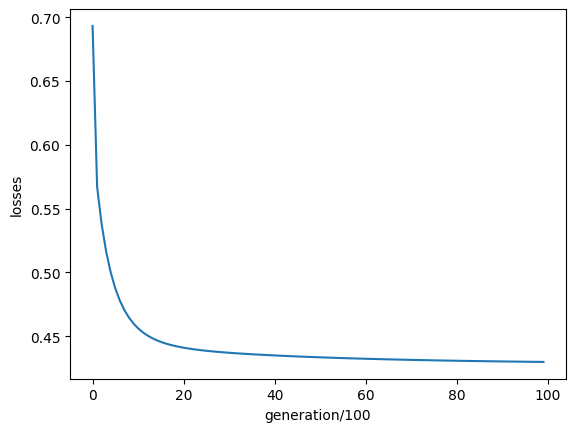

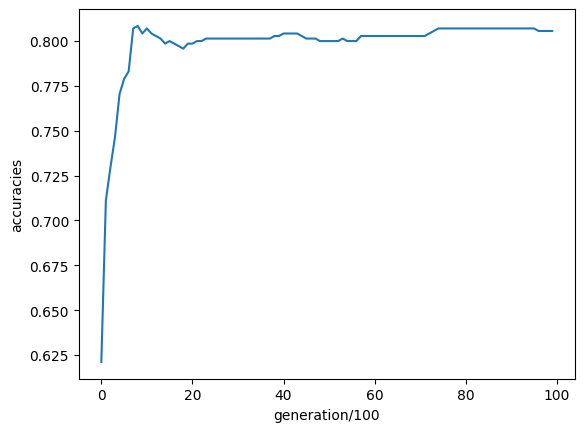

prob of me surviving [%] =  16.613940250465493


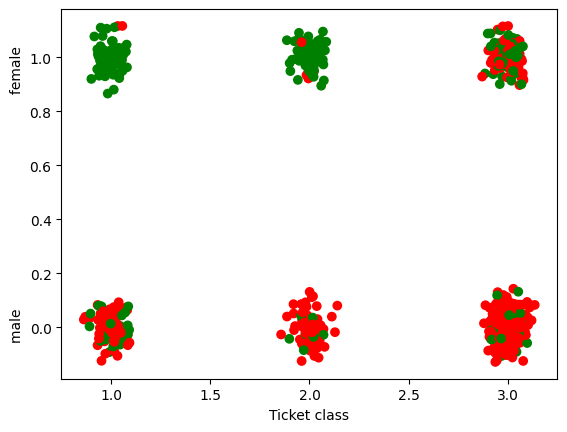

In [126]:
# se un weigth è positivo vuol dire che quella caratteristica aumenta la prob di sopravvivenza
print("w_ticket_class=", w[0])
print("w_sex=", w[1])
print("w_age=", w[2])
print("w_#_siblings_spouses=", w[3])
print("w_#_parents_children=", w[4])
print("w_passenger_fare=", w[5])
print("b=", b)
# femmine di prima classe vivono, maschi ultima muiono

plt.plot(losses); plt.xlabel("generation/100"); plt.ylabel("losses")
plt.figure()

plt.plot(accuracies); plt.xlabel("generation/100"); plt.ylabel("accuracies")
plt.show()

# points 2
print("prob of me surviving [%] = ", P_me_surviving*100)

Xrnd = X + np.random.randn(X.shape[0], X.shape[1]) / 20
scatter = plt.scatter(Xrnd[:, 0], Xrnd[:, 1], c=Y, cmap=colors)
plt.xlabel("Ticket class")
plt.ylabel("male                                                 female")
plt.show()

np.savez("model.npz", w, b) # salva le variabili del training
